## Taylor Series Expansion of a Function

- Jeffrey Voke. 2023

The Derivative Function:
$$
\\ (f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h) - f(h)}{h} ) \\
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def devFunction(f, x, h):
    """
    :param f: Function
    :param x: f argument
    :param h: stepsize
    :return: derivative of function of x
    """
    return (f(x+h) - f(x)) / h

In [5]:
"""
Create an arbitrary function which holds the
expression to be differentiated.
"""
def func(x):
    return 2*np.cos(x) ** 2 + x

In [7]:
"""
Initialize the parameter values
"""
x0 = 10.5
h = 0.3
func(10.5)

10.95227073977573

## Test and Call the Derivative Function, devFunction on the Parameters

In [8]:
devFunction(func, x0, h)

-0.25580838229950353

Higher Derivatives:
$$
\\(f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \, \frac{n!}{k!(n-k)!} \,f(x+kh))\\
$$

In [13]:
def higherDerivative(f, x, h, n):
    """

    :param f: Function
    :param x: f argument
    :param h: stepwise
    :param n: nth derivative
    :return: the nth derivative of the function of x
    """
    t = 0
    for k in range(n + 1):
        t = t + (-1) ** (k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [14]:
higherDerivative(func, x0, h, 0)

10.95227073977573

## Test Accuracy

In [16]:
higherDerivative(func, x0, h, 1) - devFunction(func, x0, h)

0.0

## Build Function for the Taylor Series Expansion

In [17]:
def taylor(f, x, x0, nmax, h):
    """

    :param f: Function
    :param x: argument of f
    :param x0: argument at which the derivatives will be computed
    :param nmax: value of n where the series will be terminated
    :param h: stepsize
    :return: taylor series expansion
    """
    t = 0
    for n in range(nmax+1):
        t = t + higherDerivative(f, x0, h, n) * (x - x0)**n / np.math.factorial(n)
    return t

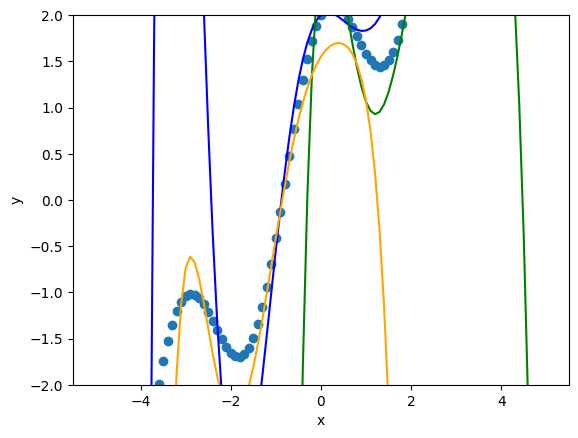

In [20]:
# value initialization
nmax=7
h = 0.3
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 2])

xList = np.linspace(-5, 5, 101)
plt.scatter(xList, func(xList))

plt.plot(xList, taylor(func, xList, 0, nmax, h), 'blue')
plt.plot(xList, taylor(func, xList, 2, nmax, h), 'green')
plt.plot(xList, taylor(func, xList, -1, nmax, h), 'orange')